In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use("seaborn")
plt.figure(figsize=(20,10));

<Figure size 1440x720 with 0 Axes>

In [2]:
d = {"motor_hacmi":[110,125,250,500,600,650,750,800,1000,1200],
    "satış_fiyatı":[14800,19700,29900,48500,75000,63700,58300,82500,103900,120900]}


In [3]:
df = pd.DataFrame(data=d)


In [4]:
df

,motor_hacmi,satış_fiyatı
0,110,14800
1,125,19700
2,250,29900
3,500,48500
4,600,75000
5,650,63700
6,750,58300
7,800,82500
8,1000,103900
9,1200,120900


In [5]:
df.describe()

,motor_hacmi,satış_fiyatı
count,10.000000,10.000000
mean,598.500000,61720.000000
std,362.583707,35054.966362
min,110.000000,14800.000000
25%,312.500000,34550.000000
50%,625.000000,61000.000000
75%,787.500000,80625.000000
max,1200.000000,120900.000000


In [6]:
df.corr()

,motor_hacmi,satış_fiyatı
motor_hacmi,1.000000,0.974982
satış_fiyatı,0.974982,1.000000


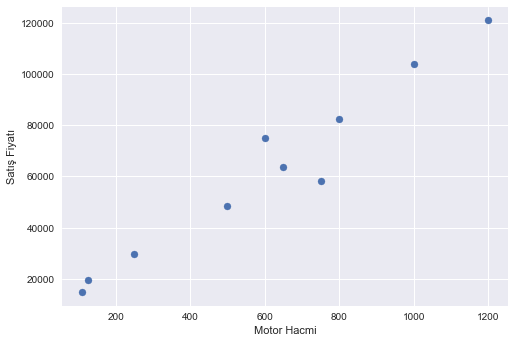

In [7]:
plt.scatter(df["motor_hacmi"],df["satış_fiyatı"])
plt.xlabel("Motor Hacmi")
plt.ylabel("Satış Fiyatı");

In [8]:
x = df[["motor_hacmi"]]
y = df[["satış_fiyatı"]]

In [9]:
x

,motor_hacmi
0,110
1,125
2,250
3,500
4,600
5,650
6,750
7,800
8,1000
9,1200


In [10]:
y

,satış_fiyatı
0,14800
1,19700
2,29900
3,48500
4,75000
5,63700
6,58300
7,82500
8,103900
9,120900


In [11]:
train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)
train_x = train_set[['motor_hacmi']]
train_y = train_set[['satış_fiyatı']]
reg = LinearRegression()
reg.fit (train_x, train_y)
# The coefficients
w = reg.coef_[0][0]
b = reg.intercept_[0]
print ('Slope:', w)
print ('Intercept:' ,b)

Slope: 93.71009220347484
Intercept: 4771.118986389032


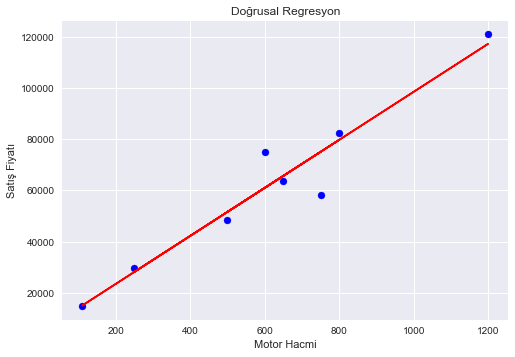

In [12]:
plt.title("Doğrusal Regresyon")
plt.scatter(train_set.motor_hacmi, train_set.satış_fiyatı, color='b')
plt.plot(train_x, w*train_x + b, '-r')
plt.xlabel("Motor Hacmi")
plt.ylabel("Satış Fiyatı");

In [15]:
from sklearn.metrics import r2_score

test_x = test_set[['motor_hacmi']]
test_y = test_set[['satış_fiyatı']]
test_yhat = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_yhat , test_y))

Mean absolute error: 4316.95
Residual sum of squares (MSE): 19850132.75
R2-score: 0.99


In [16]:
def predict_price(x):
    price = x*w+b
    return price

In [19]:
predict_price(10)

5708.219908423781